In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Group Work 3 - Interpolation


Additional resource: http://www.math.niu.edu/~dattab/MATH435.2013/INTERPOLATION

**(a)** Based on the principals of an interpolating polynomial, write the general system of equations for an interpolating polynomial $P_N(x)$ of degree $N$ that goes through $N+1$ points represent. Express this in matrix notation.

$$P_N(x) = \begin{bmatrix} 
    1      & x_0    & x_0^2  & \cdots & x_0^N  \\
    1      & x_1    & x_1^2  & \cdots & x_1^N  \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1      & x_N    & x_N^2  & \cdots & x_n^N  \\
\end{bmatrix}
 \begin{bmatrix} p_0 \\ p_1 \\ \vdots \\ p_n \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix}$$

**(b)** What does the system of equations look like if you use the Lagrangian basis?  Can you represent this in matrix form?  Think about the basis and its role in the previous question. (Hint: start from the definition of an interpolating polynomial and what it must satisfy. )

$$P_N(x) = \begin{bmatrix} 
    \ell_0      & 0      & \cdots & 0  \\
    \ell_0      & \ell_1      & \cdots & 0  \\
    \vdots      & \vdots     & \ddots & \vdots  \\
    \ell_0      & \ell_1     &\cdots & \ell_n  \\
\end{bmatrix}
 \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix} = \begin{bmatrix} P_0 \\ P_1 \\ \vdots \\ P_n \end{bmatrix}$$

Since the first row of the matrix contains $x_0$ and the second row contains $x_1$ and so on...
For the first row
$$\ell_0(x_0) = \frac{x_0 - x_1}{x_0 - x_1} = 1$$
For the second row
$$\ell_0(x_1) = \frac{x_1 - x_1}{x_0 - x_1} = 0$$

$$\ell_1(x_1) = \frac{x_1 - x_0}{x_1 - x_0} = 1$$
For the 3rd row
$$\ell_0(x_2) = \frac{x_2 - x_1}{x_0 - x_1} \cdot \frac{x_2 - x_2}{x_0 - x_2} = 0$$

$$\ell_1(x_2) = \frac{x_2 - x_0}{x_1 - x_0} \cdot \frac{x_2 - x_2}{x_1 - x_2} = 0$$

$$\ell_2(x_2) = \frac{x_2 - x_0}{x_2 - x_0} \cdot \frac{x_2 - x_1}{x_2 - x_1} = 1$$

For the nth row the pattern emerges that 

$$P_N(x) = \begin{bmatrix} 
    1     & 0      & \cdots & 0  \\
    0      & 1      & \cdots & 0  \\
    \vdots      & \vdots     & \ddots & \vdots  \\
    0      & 0     &\cdots & 1  \\
\end{bmatrix}
 \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix} = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n \end{bmatrix}$$
 
because for $\ell_i(x_n)$ if $i \neq n$ there will always be a term $\frac{x_n-x_n}{x_i-x_n}=0$

Hence only on the diagonals does $i=n$ and $j \neq i$

**(c)** Are the systems you just derived related?  What conclusion can you draw based on these two examples about the form of the linear system to find the coefficients?

The systems are related in the sense that both systems result in the same polynomial. The basis matrix depends on which basis  is used, and the coefficients are unique according to the polynomial interpolating theorem.

**(c)** Generate $N+1$ random points (take $N+1$ as user input), and construct the interpolating polynomial using a monomial basis.  For this exercise assume $x \in [-\pi, \pi]$.

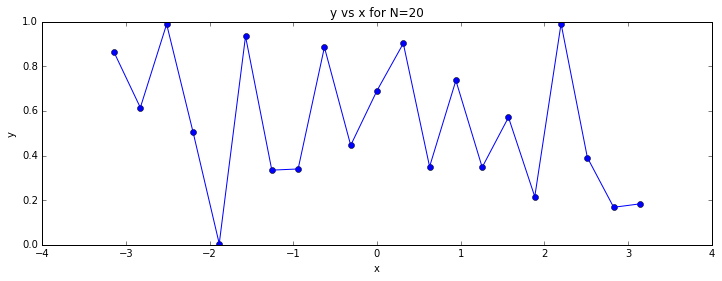

In [2]:
### INSERT CODE HERE

#parameters
N = 20
#set up a plot
fig = plt.figure()
fig.set_figwidth(2.0*fig.get_figwidth())
axes = fig.add_subplot(1,1,1)

#generate ramp\dom signal
x_sample = numpy.linspace(-numpy.pi,numpy.pi,N+1)
y_sample = numpy.random.rand(x_sample.shape[0])


coefficients = numpy.polyfit(x_sample, y_sample, x_sample.shape[0] - 1)
poly = numpy.poly1d(coefficients)
#x = numpy.linspace(-1.05*numpy.pi,1.05*numpy.pi,N+1)
y = poly(x_sample)

axes.plot(x_sample,y_sample,'o',x_sample,y,'b')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('y vs x for N=%s' %N)
plt.show()

**(d)** Do the same as before except use a Lagrangian basis.

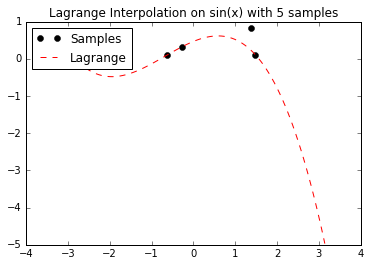

In [3]:
### INSERT CODE HERE
#Sample data on sin(x)
SAMPLE = 5

x_sample = numpy.random.rand(SAMPLE) * 2.0 * numpy.pi - numpy.pi
y_sample = numpy.random.rand(SAMPLE)

x = numpy.linspace(-1.0*numpy.pi, 1.0*numpy.pi, 100)

#Calculate lagrange basis
N = SAMPLE - 1
lagrange_basis = numpy.ones((N,x.shape[0]))

for i in xrange(N):
    for j in xrange(N):
        if i != j:
            lagrange_basis[i,:] *= (x - x_sample[j]) / (x_sample[i] - x_sample[j])
#Calculate lagrange polynomial
poly = numpy.zeros(x.shape[0])
for n in xrange(N):
    poly += lagrange_basis[n,:] * y_sample[n]

#Plot fitting curve
fig = plt.figure();
axes = fig.add_subplot(111);
axes.plot(x_sample,y_sample,'ko',label = "Samples");
axes.plot(x,poly,'r--',label = "Lagrange");
axes.set_title("Lagrange Interpolation on sin(x) with %s samples" % SAMPLE);
axes.legend(loc = 2);

**(e)** What do you observe about the basis when we leave the interval $[-\pi, pi]$?

When we leave the interval $[-\pi, pi]$ both interpolating basis are extrapolating values and the function's value vastly increases outside of this domain.